# M1 T02: Exploració i estructura de les dades - Dataframes amb Pandas

## Ejercicio 1

Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Configuracion para que se mestren todas las columnas
pd.set_option('display.max_columns', None)
# Configuracion para que los valores no se muestren con punto flotante
pd.options.display.float_format = '{:,.2f}'.format
# Lectura del fichero
df = pd.read_csv('DelayedFlights.csv')

df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,0,N,0,nan,nan,nan,nan,nan
1,1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,0,N,0,nan,nan,nan,nan,nan
2,2,2008,1,3,4,628.00,620,804.00,750,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,0,N,0,nan,nan,nan,nan,nan
3,4,2008,1,3,4,"1,829.00",1755,"1,959.00",1925,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
4,5,2008,1,3,4,"1,940.00",1915,"2,121.00",2110,WN,378,N726SW,101.00,115.00,87.00,11.00,25.00,IND,JAX,688,4.00,10.00,0,N,0,nan,nan,nan,nan,nan


In [3]:
# Tamaño de los datos
df.shape

(1936758, 30)

Tenemos datos sobre 1936758 vuelos con 30 variables que describen los mismos, como tiempo de partida, llegada, aerolinea, delays, entre otros.

In [4]:
# Información de tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [5]:
# Conocer las columnas
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
# Normalizacion de los nombres de la columnas
df.columns = [col.lower() for col in df]

In [7]:
df.columns

Index(['unnamed: 0', 'year', 'month', 'dayofmonth', 'dayofweek', 'deptime',
       'crsdeptime', 'arrtime', 'crsarrtime', 'uniquecarrier', 'flightnum',
       'tailnum', 'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'taxiin', 'taxiout',
       'cancelled', 'cancellationcode', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')

In [8]:
df.rename(columns={
    'dayofmonth': 'day_of_month', 
    'dayofweek': 'day_of_week',
    'crsdeptime': 'crs_dep_time',
    'crsarrtime': 'crs_arr_time',
    'uniquecarrier': 'unique_carrier',
    'actualelapsedtime': 'actual_elapsed_time',
    'crselapsedtime': 'crs_elapsed_time',
    'airtime': 'air_time',
    'arrdelay': 'arr_delay',
    'depdelay': 'dep_delay',
    'taxiout': 'taxi_out',
    'taxiin': 'taxi_in',
    'cancellationcode': 'cancellation_code',
    'carrierdelay': 'carrier_delay',
    'weatherdelay': 'weather_delay',
    'nasdelay': 'nas_delay',
    'securitydelay': 'security_delay',
    'lateaircraftdelay': 'late_air_craft_delay',
    'deptime': 'dep_time',
    'arrtime': 'arr_time',
    'tailnum': 'tail_num',
    'flightnum': 'flight_num'
    }, inplace=True)


In [9]:
df.columns

Index(['unnamed: 0', 'year', 'month', 'day_of_month', 'day_of_week',
       'dep_time', 'crs_dep_time', 'arr_time', 'crs_arr_time',
       'unique_carrier', 'flight_num', 'tail_num', 'actual_elapsed_time',
       'crs_elapsed_time', 'air_time', 'arr_delay', 'dep_delay', 'origin',
       'dest', 'distance', 'taxi_in', 'taxi_out', 'cancelled',
       'cancellation_code', 'diverted', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_air_craft_delay'],
      dtype='object')

Considero que las columnas que no son necesarias son:

   * tail_num: Considero que no es relevante
   * taxi_in: No tenemos datos para compararlo con algo
   * taxi_out: No tenemos datos para compararlo con algo
   * cancellation_code: Considero con que saber si fue cancelado o no es suficiente.

In [10]:
# Eliminación de columnas
del df['tail_num']
del df['taxi_in']
del df['taxi_out']
del df['cancellation_code']

## Ejercicio 2

Fes un informe complet del data set:.

   * Resumeix estadísticament les columnes d’interès
   * Troba quantes dades faltants hi ha per columna
   * Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
   * Taula de les aerolínies amb més endarreriments acumulats
   * Quins són els vols més llargs? I els més endarrerits?
   * Etc.


### Resumeix estadísticament les columnes d’interès

In [11]:
df.describe()

,unnamed: 0,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,flight_num,actual_elapsed_time,crs_elapsed_time,air_time,arr_delay,dep_delay,distance,cancelled,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_air_craft_delay
count,"1,936,758.00","1,936,758.00","1,936,758.00","1,936,758.00","1,936,758.00","1,936,758.00","1,936,758.00","1,929,648.00","1,936,758.00","1,936,758.00","1,928,371.00","1,936,560.00","1,928,371.00","1,928,371.00","1,936,758.00","1,936,758.00","1,936,758.00","1,936,758.00","1,247,488.00","1,247,488.00","1,247,488.00","1,247,488.00","1,247,488.00"
mean,"3,341,651.15","2,008.00",6.11,15.75,3.98,"1,518.53","1,467.47","1,610.14","1,634.22","2,184.26",133.31,134.30,108.28,42.20,43.19,765.69,0.00,0.00,19.18,3.70,15.02,0.09,25.30
std,"2,066,064.96",0.00,3.48,8.78,2.00,450.49,424.77,548.18,464.63,"1,944.70",72.06,71.34,68.64,56.78,53.40,574.48,0.02,0.06,43.55,21.49,33.83,2.02,42.05
min,0.00,"2,008.00",1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,-25.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,517,452.50","2,008.00",3.00,8.00,2.00,"1,203.00","1,135.00","1,316.00","1,325.00",610.00,80.00,82.00,58.00,9.00,12.00,338.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,242,558.00","2,008.00",6.00,16.00,4.00,"1,545.00","1,510.00","1,715.00","1,705.00","1,543.00",116.00,116.00,90.00,24.00,24.00,606.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,"4,972,466.75","2,008.00",9.00,23.00,6.00,"1,900.00","1,815.00","2,030.00","2,014.00","3,422.00",165.00,165.00,137.00,56.00,53.00,998.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,"7,009,727.00","2,008.00",12.00,31.00,7.00,"2,400.00","2,359.00","2,400.00","2,400.00","9,742.00","1,114.00",660.00,"1,091.00","2,461.00","2,467.00","4,962.00",1.00,1.00,"2,436.00","1,352.00","1,357.00",392.00,"1,316.00"


Aqui podemos ver por ejemplo que el promedio de demora del despegue es de 43 minutos, y el promedio de demora del aterrizaje es de 42.2 minutos.

La cantidad máxima de demora del despegue fue de 2467 minutos y el minimo es de 6 minutos.

In [12]:
df['unique_carrier'].describe()

count     1936758
unique         20
top            WN
freq       377602
Name: unique_carrier, dtype: object

Tenemos un total de 20 aerolineas, donde La aerolinea con mas vuelos es Southwest Airlines con 377602 vuelos.

In [13]:
df['year'].unique()

array([2008], dtype=int64)

In [14]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Los datos que tenemos son del todo el año del 2008

### Troba quantes dades faltants hi ha per columna

In [15]:
# Obtener valores nulos por columnas
df.isnull().sum()

unnamed: 0                   0
year                         0
month                        0
day_of_month                 0
day_of_week                  0
dep_time                     0
crs_dep_time                 0
arr_time                  7110
crs_arr_time                 0
unique_carrier               0
flight_num                   0
actual_elapsed_time       8387
crs_elapsed_time           198
air_time                  8387
arr_delay                 8387
dep_delay                    0
origin                       0
dest                         0
distance                     0
cancelled                    0
diverted                     0
carrier_delay           689270
weather_delay           689270
nas_delay               689270
security_delay          689270
late_air_craft_delay    689270
dtype: int64

#### Análisis de las variables nulas

In [16]:
df[['diverted','cancelled']][(df['arr_time'].isnull()) & ((df['diverted'] == 1) | (df['cancelled'] == 1))].count()

diverted     7110
cancelled    7110
dtype: int64

Los **arr_time** nulos son porque el vuelo fue cancelado o desviado

In [17]:
df['diverted'][((df['diverted'] == 1) | (df['cancelled'] == 1))].count()

8387

Los **actual_elapsed_time**, **air_time** y **arr_delay** nulos son porque el vuelo fue cancelado o desviado

###  Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)

In [18]:
# Se agrega columna que indica si el vuelo llegó tarde o no
def arrived_late(row):
    if row['arr_delay'] > 0:
        return 'yes'
    return 'no'

df['arr_late'] = df.apply(arrived_late, axis = 1)

In [19]:
# Se agrega columna que indica la valocidad media del vuelo
def calculate_velocity(row):
    if row['air_time'] > 0:
        return row['distance'] / row['air_time']
    return 0

df['plane_speed'] = df.apply(calculate_velocity, axis = 1)

In [20]:
# Mostrar las nuevas columnas
df.head()

,unnamed: 0,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,actual_elapsed_time,crs_elapsed_time,air_time,arr_delay,dep_delay,origin,dest,distance,cancelled,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_air_craft_delay,arr_late,plane_speed
0,0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,335,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,0,0,nan,nan,nan,nan,nan,no,6.98
1,1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,3231,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,0,0,nan,nan,nan,nan,nan,yes,7.17
2,2,2008,1,3,4,628.00,620,804.00,750,WN,448,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,0,0,nan,nan,nan,nan,nan,yes,6.78
3,4,2008,1,3,4,"1,829.00",1755,"1,959.00",1925,WN,3920,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,0,0,2.00,0.00,0.00,0.00,32.00,yes,6.69
4,5,2008,1,3,4,"1,940.00",1915,"2,121.00",2110,WN,378,101.00,115.00,87.00,11.00,25.00,IND,JAX,688,0,0,nan,nan,nan,nan,nan,yes,7.91


###  Taula de les aerolínies amb més endarreriments acumulats

In [21]:
aerolinea_delay = df[['unique_carrier', 'dep_delay']][df['dep_delay'] > 0]
aerolinea_delay = aerolinea_delay.groupby(by='unique_carrier').count()
aerolinea_delay.sort_values(by='dep_delay', ascending=False).head()

,dep_delay
unique_carrier,
WN,377602
AA,191865
MQ,141920
UA,141426
OO,132433


La aeroliea con mas retrasos es Southwest Airlines con 377602.

### Quins són els vols més llargs? I els més endarrerits?

In [22]:
df[['unique_carrier', 'flight_num', 'actual_elapsed_time','origin', 'dest']].sort_values(by='actual_elapsed_time', ascending=False).head()

,unique_carrier,flight_num,actual_elapsed_time,origin,dest
1488690,HA,21,"1,114.00",SEA,HNL
1926817,CO,15,790.00,EWR,HNL
1173580,DL,151,776.00,JFK,SFO
1418032,CO,15,750.00,EWR,HNL
1367047,HA,28,750.00,HNL,SEA


El Vuelo más largo es el HA21, de Seattle a Honolulu, Hawái.

In [23]:
flight_delay = df[['origin','dest','dep_delay']][df['dep_delay'] > 0]
flight_delay = flight_delay.groupby(by=['origin','dest']).count()
flight_delay.sort_values(by='dep_delay', ascending=False).head()

,,dep_delay
origin,dest,
LAX,SFO,4739
ORD,LGA,4396
ATL,LGA,4058
SFO,LAX,4020
LAS,LAX,3516


El Vuelo con más retrasos es el de Los Angeles a San Francisco.

#### En que meses hay mas retrasos?

Text(0, 0.5, 'Cantidad de retrasos')

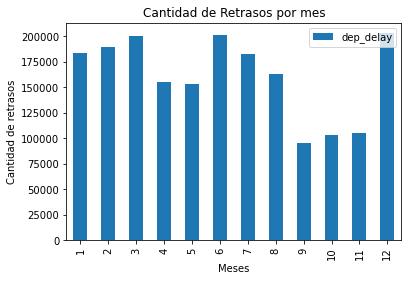

In [24]:
flight_delay_month = df[['month','dep_delay']][((df['dep_delay'] > 0))]
flight_delay_month = flight_delay_month.groupby(by=['month']).count()
graph = flight_delay_month.plot(kind='bar', title='Cantidad de Retrasos por mes')
graph.set_xlabel("Meses")
graph.set_ylabel("Cantidad de retrasos")
                   

Podemos observar que en los meses de inverno hay picos de retrasos

#### Cuál es la mayor causa de retrasos?

In [25]:
weather_delay_year = df[['year','weather_delay']][((df['weather_delay'] > 0))]
cantidad_total_delay = weather_delay_year.groupby(by=['year']).count()

In [26]:
carrier_delay_year = df[['year','carrier_delay']][((df['carrier_delay'] > 0))]
cantidad_total_delay['carrier_delay'] = carrier_delay_year.groupby(by=['year']).count()

In [27]:
carrier_nas_delay = df[['year','nas_delay']][((df['nas_delay'] > 0))]
cantidad_total_delay['nas_delay'] = carrier_nas_delay.groupby(by=['year']).count()

In [28]:
carrier_late_air_craft_delay = df[['year','late_air_craft_delay']][((df['late_air_craft_delay'] > 0))]
cantidad_total_delay['late_air_craft_delay'] = carrier_late_air_craft_delay.groupby(by=['year']).count()

In [29]:
carrier_security_delay = df[['year','security_delay']][((df['security_delay'] > 0))]
cantidad_total_delay['security_delay'] = carrier_security_delay.groupby(by=['year']).count()

<AxesSubplot:title={'center':'Cantidad de Retrasos por mes'}, xlabel='year'>

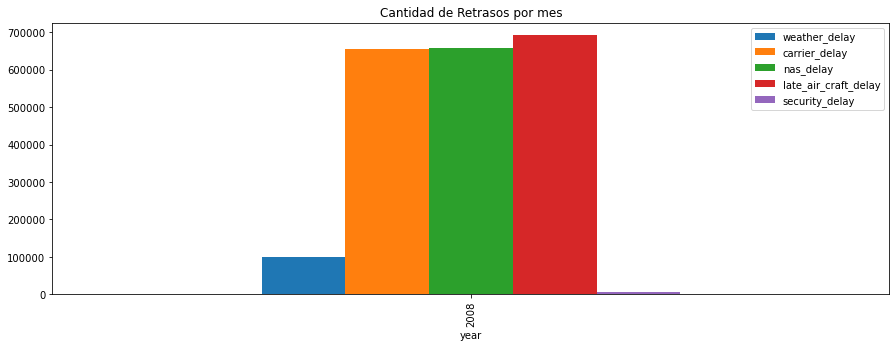

In [30]:
plt.rcParams['figure.figsize'] = (15, 5)
cantidad_total_delay.plot(kind='bar', title='Cantidad de Retrasos por mes')

En este gráfico podemos ver que los mayores retrasos son por la demora de aviones que llegan desde otro aeropuerto, pero así también hay grandes cantdades debido a sucesos relacionado al tramportista aereo y del Sistema Nacional del Espacio Aéreo (NAS)

###  Exporta el data set net i amb les noves columnes a Excel.

In [33]:
#Excel tiene como limite 1048576 filas, le pongo limite de 5 porque si no tardaba demasiado.
df.iloc[0:5].to_excel('df_updated.xlsx', index = False)